# Project Problem Statement : 
## Predict The Sale Prices of Houses in the City of Ames, Lowa and United States between 2006 to 2010

<ul>
    <li><a href=#intro>Introduction</a></li>
    <li><a href=#Pf>Data Preprocessing/Feature Engineering</a></li>
    <li><a href=#mod>Modeling</a></li>
    <li><a href=#hp>Hyperparameter Tuning</a></li>
    <li><a href=#Conc>Conclusion</a></li>
    <li><a href=#Reco>Recommendation</a></li>
    <li><a href=#Lim>Limitation</a></li>
    <li><a href=#Ref>References</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this section of the project,i will be using simple and mulitiple linear regression model to predict the sale prices of city of Ames, Lowa and United States. Knowing fully well that the target is a continous variable, hence relevant and best model will be used and standard thresholds will be set.

In [1]:
#import all necessaries classes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
#read in the data
df= pd.read_csv('CleanData_for_model.csv')

In [3]:
#display first 5 rows
df.head()

,Unnamed: 0,Order,PID,Dwelling_Type,Zoning_classification_of_sale,Lot Frontage,Lot Area,Street,Alley,Property_Shape,...,Pool_Quality,Fence_Quality,Misc Feature,Misc Val,Mo Sold,Year_Sold,Sale Type,Sale Condition,SalePrice,Years until Remolded
0,0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,...,NaN,NaN,NaN,0,5,2010,WD,Normal,215000,0
1,1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,0
2,2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000,0
3,3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,...,NaN,NaN,NaN,0,4,2010,WD,Normal,244000,0
4,4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,1


In [4]:
df=df.drop(columns=['Unnamed: 0'], axis=1)

In [5]:
df.shape

(2930, 81)

In [6]:
df.shape[0]/2

1465.0

In [7]:
#create a function that will be used for features transformation
def transform_features(df):
    return df

In [8]:
#create a function for feature selection
def select_features(df):
    df[['Gr Liv Area', 'SalePrice']]
        

In [9]:
def train_and_test(df):
    """ create train, test data, make predictions and get rmse"""
    train=df.iloc[0:1460]
    test=df.iloc[1460:]
    
    #use numerical columns only
    numeric_train=train.select_dtypes(include=['int','float'])
    numeric_test=test.select_dtypes(include=['int','float'])
    
    x_train=numeric_train.drop(columns=['SalePrice'], axis=1)
    y_train=numeric_train['SalePrice']
    x_test=numeric_test.drop(columns=['SalePrice'], axis=1)
    y_test=numeric_test['SalePrice']
    
    #instantiate the model
    reg=LinearRegression()
    
    #use the fit method to fit the train data
    reg.fit(x_train, y_train)
    
    #make predictions
    y_predicted=reg.predict(x_test)
    
    #get the rmse values
    rmse=mean_squared_error(y_test, y_predicted, squared=False)
    return rmse

In [10]:
rmse= train_and_test(df)

In [11]:
rmse

70617.75609767428

<a id='pf'></a>
## Data Preprocessing/Feature Engineering

- I will drop from all the columns any with at least 5% missing values
- For the text columns i will drop any of them with at least 1 missing value
- For numerical columns fill in with median

In [12]:
#display the missing values
df.isnull().sum()

Order                            0
PID                              0
Dwelling_Type                    0
Zoning_classification_of_sale    0
Lot Frontage                     0
                                ..
Year_Sold                        0
Sale Type                        0
Sale Condition                   0
SalePrice                        0
Years until Remolded             0
Length: 81, dtype: int64

In [13]:
#display the percentage of missing values
mssg_val=df.isnull().sum()
df_total=df.shape[0]
df_per=mssg_val/df_total*100
df_per

Order                            0.0
PID                              0.0
Dwelling_Type                    0.0
Zoning_classification_of_sale    0.0
Lot Frontage                     0.0
                                ... 
Year_Sold                        0.0
Sale Type                        0.0
Sale Condition                   0.0
SalePrice                        0.0
Years until Remolded             0.0
Length: 81, dtype: float64

In [14]:
#display columns that are above 5%
above_5=df_per[df_per > 0.05]
above_5

Alley                  93.242321
Masonry_veneer_Type     0.784983
Bsmt Qual               2.730375
Bsmt Cond               2.730375
Bsmt Exposure           2.832765
BsmtFin Type 1          2.730375
BsmtFin Type 2          2.764505
Fireplace_Quality      48.532423
Garage Type             5.358362
Garage Finish           5.426621
Garage Quality          5.426621
Garage_Condition        5.426621
Pool_Quality           99.556314
Fence_Quality          80.477816
Misc Feature           96.382253
dtype: float64

In [15]:
df.head()

,Order,PID,Dwelling_Type,Zoning_classification_of_sale,Lot Frontage,Lot Area,Street,Alley,Property_Shape,Land Contour,...,Pool_Quality,Fence_Quality,Misc Feature,Misc Val,Mo Sold,Year_Sold,Sale Type,Sale Condition,SalePrice,Years until Remolded
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,5,2010,WD,Normal,215000,0
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,0
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000,0
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,4,2010,WD,Normal,244000,0
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,1


In [16]:

df=df.drop(columns=['Alley','Masonry_veneer_Type','Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2',
        'Fireplace_Quality','Garage Type','Garage Finish','Garage Quality','Garage_Condition','Pool_Quality','Fence_Quality'
        ,'Misc Feature'], axis=1)

In [17]:
df.head()

,Order,PID,Dwelling_Type,Zoning_classification_of_sale,Lot Frontage,Lot Area,Street,Property_Shape,Land Contour,Utilities,...,3Season_Porc_Area,Screen Porch,Pool Area,Misc Val,Mo Sold,Year_Sold,Sale Type,Sale Condition,SalePrice,Years until Remolded
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,5,2010,WD,Normal,215000,0
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,120,0,0,6,2010,WD,Normal,105000,0
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,12500,6,2010,WD,Normal,172000,0
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,4,2010,WD,Normal,244000,0
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,3,2010,WD,Normal,189900,1


In [18]:
df=df.drop(columns=['Electrical'], axis=1)

In [19]:
#display numerical columns
numerical_col=df.select_dtypes(include=['int','float'])
numerical_col.isnull().sum()

Order                      0
PID                        0
Dwelling_Type              0
Lot Frontage               0
Lot Area                   0
Overall Quality            0
Overall_Condition          0
Masonry_veneer_Area        0
BsmtFin SF 1               0
BsmtFin SF 2               0
Bsmt Unf SF                0
Total Bsmt SF              0
1st Flr SF                 0
2nd Flr SF                 0
Low Qual Fin SF            0
Gr Liv Area                0
Bsmt Full Bath             0
Basement_Half_Bathrooms    0
Full Bath                  0
Half Bath                  0
Bedroom AbvGr              0
Kitchen AbvGr              0
TotRms AbvGrd              0
Fireplaces                 0
Garage_Built_Year          0
Garage Cars                0
Garage Area                0
Wood_Deck_Area             0
Open_Porch_Area            0
Enclosed Porch             0
3Season_Porc_Area          0
Screen Porch               0
Pool Area                  0
Misc Val                   0
Mo Sold       

In [20]:
df.head()

,Order,PID,Dwelling_Type,Zoning_classification_of_sale,Lot Frontage,Lot Area,Street,Property_Shape,Land Contour,Utilities,...,3Season_Porc_Area,Screen Porch,Pool Area,Misc Val,Mo Sold,Year_Sold,Sale Type,Sale Condition,SalePrice,Years until Remolded
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,5,2010,WD,Normal,215000,0
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,120,0,0,6,2010,WD,Normal,105000,0
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,12500,6,2010,WD,Normal,172000,0
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,4,2010,WD,Normal,244000,0
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,3,2010,WD,Normal,189900,1


In [21]:
#drop columns that will not aid good model
df=df.drop(columns=['Order', 'PID','Sale Type','Year_Sold','Mo Sold','Sale Condition','Sale Type'])

In [22]:
df.head()

,Dwelling_Type,Zoning_classification_of_sale,Lot Frontage,Lot Area,Street,Property_Shape,Land Contour,Utilities,Property_configuration,Land Slope,...,Paved_Driveway,Wood_Deck_Area,Open_Porch_Area,Enclosed Porch,3Season_Porc_Area,Screen Porch,Pool Area,Misc Val,SalePrice,Years until Remolded
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,P,210,62,0,0,0,0,0,215000,0
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Y,140,0,0,0,120,0,0,105000,0
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,Y,393,36,0,0,0,0,12500,172000,0
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,Y,0,0,0,0,0,0,0,244000,0
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Y,212,34,0,0,0,0,0,189900,1


In [23]:
def select_features(df):
    df[['Gr Liv Area', 'SalePrice']]
    
def train_and_test(df):
    train=df.iloc[0:1460]
    test=df.iloc[1460:]
    
    numeric_train=train.select_dtypes(include=['int','float'])
    numeric_test=test.select_dtypes(include=['int','float'])
    
    x_train=numeric_train.drop(columns=['SalePrice'], axis=1)
    y_train=numeric_train['SalePrice']
    x_test=numeric_test.drop(columns=['SalePrice'], axis=1)
    y_test=numeric_test['SalePrice']
    
    reg=LinearRegression()
    
    reg.fit(x_train, y_train)
    y_predicted=reg.predict(x_test)
    
    rmse=mean_squared_error(y_test, y_predicted, squared=False)
    return rmse
rmse=train_and_test(df)
    

In [24]:
rmse

71514.08802457318

## Feature Selection

In [25]:
#get only the numerical columns
numerical_data=df.select_dtypes(include=['int','float'])
numerical_data.head()

,Dwelling_Type,Lot Frontage,Lot Area,Overall Quality,Overall_Condition,Masonry_veneer_Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Garage Area,Wood_Deck_Area,Open_Porch_Area,Enclosed Porch,3Season_Porc_Area,Screen Porch,Pool Area,Misc Val,SalePrice,Years until Remolded
0,20,141.0,31770,6,5,112.0,639.0,0.0,441.0,1080.0,...,528.0,210,62,0,0,0,0,0,215000,0
1,20,80.0,11622,5,6,0.0,468.0,144.0,270.0,882.0,...,730.0,140,0,0,0,120,0,0,105000,0
2,20,81.0,14267,6,6,108.0,923.0,0.0,406.0,1329.0,...,312.0,393,36,0,0,0,0,12500,172000,0
3,20,93.0,11160,7,5,0.0,1065.0,0.0,1045.0,2110.0,...,522.0,0,0,0,0,0,0,0,244000,0
4,60,74.0,13830,5,5,0.0,791.0,0.0,137.0,928.0,...,482.0,212,34,0,0,0,0,0,189900,1


In [26]:
#display only the text data
text_data=df.select_dtypes(include=['object'])
text_data

,Zoning_classification_of_sale,Street,Property_Shape,Land Contour,Utilities,Property_configuration,Land Slope,Neighborhood,Condition 1,Condition 2,...,Exterior 2nd,Exter Qual,Exter Cond,Foundation,Heating,Heating QC,Central Air,Kitchen Qual,Functional,Paved_Driveway
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Plywood,TA,TA,CBlock,GasA,Fa,Y,TA,Typ,P
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,VinylSd,TA,TA,CBlock,GasA,TA,Y,TA,Typ,Y
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Wd Sdng,TA,TA,CBlock,GasA,TA,Y,Gd,Typ,Y
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,BrkFace,Gd,TA,CBlock,GasA,Ex,Y,Ex,Typ,Y
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,VinylSd,TA,TA,PConc,GasA,Gd,Y,TA,Typ,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,...,HdBoard,TA,TA,CBlock,GasA,TA,Y,TA,Typ,Y
2926,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,...,HdBoard,TA,TA,CBlock,GasA,TA,Y,TA,Typ,Y
2927,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,Wd Shng,TA,TA,PConc,GasA,TA,Y,TA,Typ,Y
2928,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,...,HdBoard,TA,TA,CBlock,GasA,Gd,Y,TA,Typ,Y


In [27]:
#show the correlation between numerical columns and against the target column
corr_nu=numerical_data.corr()
corr_nu

,Dwelling_Type,Lot Frontage,Lot Area,Overall Quality,Overall_Condition,Masonry_veneer_Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Garage Area,Wood_Deck_Area,Open_Porch_Area,Enclosed Porch,3Season_Porc_Area,Screen Porch,Pool Area,Misc Val,SalePrice,Years until Remolded
Dwelling_Type,1.000000,-0.391497,-0.204613,0.039419,-0.067349,0.003634,-0.060019,-0.070847,-0.130339,-0.219374,...,-0.103234,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,-0.085092,-0.008367
Lot Frontage,-0.391497,1.000000,0.362758,0.198917,-0.067140,0.201685,0.198161,0.039157,0.109586,0.329406,...,0.336829,0.102790,0.150107,0.012165,0.025157,0.070101,0.160860,0.035368,0.340256,-0.069132
Lot Area,-0.204613,0.362758,1.000000,0.097188,-0.034759,0.125950,0.191574,0.083198,0.023696,0.253601,...,0.212819,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.266549,-0.010451
Overall Quality,0.039419,0.198917,0.097188,1.000000,-0.094812,0.423089,0.284091,-0.041122,0.270062,0.547157,...,0.563436,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.799262,-0.256948
Overall_Condition,-0.067349,-0.067140,-0.034759,-0.094812,1.000000,-0.132472,-0.050991,0.040992,-0.136872,-0.173356,...,-0.153745,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.101697,0.505496
Masonry_veneer_Area,0.003634,0.201685,0.125950,0.423089,-0.132472,1.000000,0.299841,-0.014955,0.089481,0.393477,...,0.370353,0.165875,0.140003,-0.109915,0.014222,0.066817,0.004893,0.045276,0.502196,-0.219680
BsmtFin SF 1,-0.060019,0.198161,0.191574,0.284091,-0.050991,0.299841,1.000000,-0.054112,-0.477857,0.536551,...,0.309881,0.224028,0.124974,-0.100433,0.050546,0.095888,0.084143,0.092890,0.432862,-0.220465
BsmtFin SF 2,-0.070847,0.039157,0.083198,-0.041122,0.040992,-0.014955,-0.054112,1.000000,-0.238590,0.089971,...,0.003404,0.098591,-0.005516,0.032415,-0.023314,0.062978,0.044403,-0.005195,0.006018,-0.019367
Bsmt Unf SF,-0.130339,0.109586,0.023696,0.270062,-0.136872,0.089481,-0.477857,-0.238590,1.000000,0.411731,...,0.164262,-0.039564,0.118920,0.006255,-0.005438,-0.048061,-0.031994,-0.010160,0.182895,-0.019315
Total Bsmt SF,-0.219374,0.329406,0.253601,0.547157,-0.173356,0.393477,0.536551,0.089971,0.411731,1.000000,...,0.485458,0.229944,0.245639,-0.085206,0.037876,0.075354,0.072130,0.083908,0.632164,-0.254705


In [28]:
#show how each columns correlates with the target column and get the abosolute of each
f_t_corr=corr_nu['SalePrice']
df_corr=np.abs(f_t_corr)
df_corr

Dwelling_Type              0.085092
Lot Frontage               0.340256
Lot Area                   0.266549
Overall Quality            0.799262
Overall_Condition          0.101697
Masonry_veneer_Area        0.502196
BsmtFin SF 1               0.432862
BsmtFin SF 2               0.006018
Bsmt Unf SF                0.182895
Total Bsmt SF              0.632164
1st Flr SF                 0.621676
2nd Flr SF                 0.269373
Low Qual Fin SF            0.037660
Gr Liv Area                0.706780
Bsmt Full Bath             0.275823
Basement_Half_Bathrooms    0.035817
Full Bath                  0.545604
Half Bath                  0.285056
Bedroom AbvGr              0.143913
Kitchen AbvGr              0.119814
TotRms AbvGrd              0.495474
Fireplaces                 0.474558
Garage_Built_Year          0.508882
Garage Cars                0.647812
Garage Area                0.640381
Wood_Deck_Area             0.327143
Open_Porch_Area            0.312951
Enclosed Porch             0

In [29]:
#drop features whose correlation coefficient is less than 0.4
df=df.drop(df_corr[df_corr < 0.4].index, axis=1)

In [30]:
df.head()

,Zoning_classification_of_sale,Street,Property_Shape,Land Contour,Utilities,Property_configuration,Land Slope,Neighborhood,Condition 1,Condition 2,...,Full Bath,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage_Built_Year,Garage Cars,Garage Area,Paved_Driveway,SalePrice
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,1,TA,7,Typ,2,1960.0,2.0,528.0,P,215000
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,1,TA,5,Typ,0,1961.0,1.0,730.0,Y,105000
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,1,Gd,6,Typ,0,1958.0,1.0,312.0,Y,172000
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,2,Ex,8,Typ,2,1968.0,2.0,522.0,Y,244000
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,2,TA,6,Typ,1,1997.0,2.0,482.0,Y,189900


In [31]:
#what categorical features should be dropped and the ones to be kept should be  transformed
text_data.columns

Index(['Zoning_classification_of_sale', 'Street', 'Property_Shape',
       'Land Contour', 'Utilities', 'Property_configuration', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Roof Style', 'Roof_Materials', 'Exterior 1st',
       'Exterior 2nd', 'Exter Qual', 'Exter Cond', 'Foundation', 'Heating',
       'Heating QC', 'Central Air', 'Kitchen Qual', 'Functional',
       'Paved_Driveway'],
      dtype='object')

In [32]:
#put the object columns in a list
norminal_or_ordinal_features = ['Zoning_classification_of_sale', 'Street', 'Property_Shape',
       'Land Contour', 'Utilities', 'Property_configuration', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Roof Style', 'Roof_Materials', 'Exterior 1st',
       'Exterior 2nd', 'Exter Qual', 'Exter Cond', 'Foundation', 'Heating',
       'Heating QC', 'Central Air', 'Kitchen Qual', 'Functional',
       'Paved_Driveway']

In [33]:
text_cols={}
for col in norminal_or_ordinal_features:
    if col in df.columns:
        unique_count_col=df[col].nunique()
        text_cols[col]=unique_count_col   

text_cols

{'Zoning_classification_of_sale': 7,
 'Street': 2,
 'Property_Shape': 4,
 'Land Contour': 4,
 'Utilities': 3,
 'Property_configuration': 5,
 'Land Slope': 3,
 'Neighborhood': 28,
 'Condition 1': 9,
 'Condition 2': 8,
 'Bldg Type': 5,
 'House Style': 8,
 'Roof Style': 6,
 'Roof_Materials': 8,
 'Exterior 1st': 16,
 'Exterior 2nd': 17,
 'Exter Qual': 4,
 'Exter Cond': 5,
 'Foundation': 6,
 'Heating': 6,
 'Heating QC': 5,
 'Central Air': 2,
 'Kitchen Qual': 5,
 'Functional': 8,
 'Paved_Driveway': 3}

In [34]:
#drop those columns whose unique count is grater than 5


df=df.drop(columns=['Neighborhood','Exterior 1st','Exterior 2nd','Zoning_classification_of_sale','Functional','Roof_Materials',
         'Roof Style','House Style','Condition 2','Condition 1'], axis=1)     

In [35]:
df.head()

,Street,Property_Shape,Land Contour,Utilities,Property_configuration,Land Slope,Bldg Type,Overall Quality,Masonry_veneer_Area,Exter Qual,...,Gr Liv Area,Full Bath,Kitchen Qual,TotRms AbvGrd,Fireplaces,Garage_Built_Year,Garage Cars,Garage Area,Paved_Driveway,SalePrice
0,Pave,IR1,Lvl,AllPub,Corner,Gtl,1Fam,6,112.0,TA,...,1656,1,TA,7,2,1960.0,2.0,528.0,P,215000
1,Pave,Reg,Lvl,AllPub,Inside,Gtl,1Fam,5,0.0,TA,...,896,1,TA,5,0,1961.0,1.0,730.0,Y,105000
2,Pave,IR1,Lvl,AllPub,Corner,Gtl,1Fam,6,108.0,TA,...,1329,1,Gd,6,0,1958.0,1.0,312.0,Y,172000
3,Pave,Reg,Lvl,AllPub,Corner,Gtl,1Fam,7,0.0,Gd,...,2110,2,Ex,8,2,1968.0,2.0,522.0,Y,244000
4,Pave,IR1,Lvl,AllPub,Inside,Gtl,1Fam,5,0.0,TA,...,1629,2,TA,6,1,1997.0,2.0,482.0,Y,189900


In [36]:
#convert the object to category datatype
object_df=df.select_dtypes(include=['object'])
object_df

for col in object_df:
    df[col]=df[col].astype('category')

In [37]:
cat_df=df.select_dtypes(include=['category'])
cat_df.head()

,Street,Property_Shape,Land Contour,Utilities,Property_configuration,Land Slope,Bldg Type,Exter Qual,Exter Cond,Foundation,Heating,Heating QC,Central Air,Kitchen Qual,Paved_Driveway
0,Pave,IR1,Lvl,AllPub,Corner,Gtl,1Fam,TA,TA,CBlock,GasA,Fa,Y,TA,P
1,Pave,Reg,Lvl,AllPub,Inside,Gtl,1Fam,TA,TA,CBlock,GasA,TA,Y,TA,Y
2,Pave,IR1,Lvl,AllPub,Corner,Gtl,1Fam,TA,TA,CBlock,GasA,TA,Y,Gd,Y
3,Pave,Reg,Lvl,AllPub,Corner,Gtl,1Fam,Gd,TA,CBlock,GasA,Ex,Y,Ex,Y
4,Pave,IR1,Lvl,AllPub,Inside,Gtl,1Fam,TA,TA,PConc,GasA,Gd,Y,TA,Y


In [38]:
cat_df.columns

Index(['Street', 'Property_Shape', 'Land Contour', 'Utilities',
       'Property_configuration', 'Land Slope', 'Bldg Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Heating', 'Heating QC', 'Central Air',
       'Kitchen Qual', 'Paved_Driveway'],
      dtype='object')

In [39]:
cat_columns=['Street', 'Property_Shape', 'Land Contour', 'Utilities',
       'Property_configuration', 'Land Slope', 'Bldg Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Heating', 'Heating QC', 'Central Air',
       'Kitchen Qual', 'Paved_Driveway']        

In [40]:
text_count={}
for col in cat_columns:
    if col in df.columns:
        count=df[col].value_counts()
        text_count[col]=count
text_count

{'Street': Pave    2918
 Grvl      12
 Name: Street, dtype: int64,
 'Property_Shape': Reg    1859
 IR1     979
 IR2      76
 IR3      16
 Name: Property_Shape, dtype: int64,
 'Land Contour': Lvl    2633
 HLS     120
 Bnk     117
 Low      60
 Name: Land Contour, dtype: int64,
 'Utilities': AllPub    2927
 NoSewr       2
 NoSeWa       1
 Name: Utilities, dtype: int64,
 'Property_configuration': Inside     2140
 Corner      511
 CulDSac     180
 FR2          85
 FR3          14
 Name: Property_configuration, dtype: int64,
 'Land Slope': Gtl    2789
 Mod     125
 Sev      16
 Name: Land Slope, dtype: int64,
 'Bldg Type': 1Fam      2425
 TwnhsE     233
 Duplex     109
 Twnhs      101
 2fmCon      62
 Name: Bldg Type, dtype: int64,
 'Exter Qual': TA    1799
 Gd     989
 Ex     107
 Fa      35
 Name: Exter Qual, dtype: int64,
 'Exter Cond': TA    2549
 Gd     299
 Fa      67
 Ex      12
 Po       3
 Name: Exter Cond, dtype: int64,
 'Foundation': PConc     1310
 CBlock    1244
 BrkTil     311

Looking at the value count of the categorical columns above, Street, Utilities, Land Slope and Heating have few unique values with just a value having more than 95% of the values in the column, hence, it will be dropped.

In [41]:
df=df.drop(columns=['Utilities','Street','Land Slope','Heating'], axis=1)

In [42]:
#convert the categorical data to dummie and delete the real columns
cat_df=df.select_dtypes(include=['category'])

for col in cat_df:
    cat_dummies=pd.get_dummies(cat_df[col])
    df=pd.concat([df, cat_dummies], axis=1)
    del df[col]

In [43]:
df.head()

,Overall Quality,Masonry_veneer_Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Fireplaces,Garage_Built_Year,...,N,Y,Ex,Fa,Gd,Po,TA,N,P,Y
0,6,112.0,639.0,1080.0,1656,1656,1,7,2,1960.0,...,0,1,0,0,0,0,1,0,1,0
1,5,0.0,468.0,882.0,896,896,1,5,0,1961.0,...,0,1,0,0,0,0,1,0,0,1
2,6,108.0,923.0,1329.0,1329,1329,1,6,0,1958.0,...,0,1,0,0,1,0,0,0,0,1
3,7,0.0,1065.0,2110.0,2110,2110,2,8,2,1968.0,...,0,1,1,0,0,0,0,0,0,1
4,5,0.0,791.0,928.0,928,1629,2,6,1,1997.0,...,0,1,0,0,0,0,1,0,0,1


<AxesSubplot:>

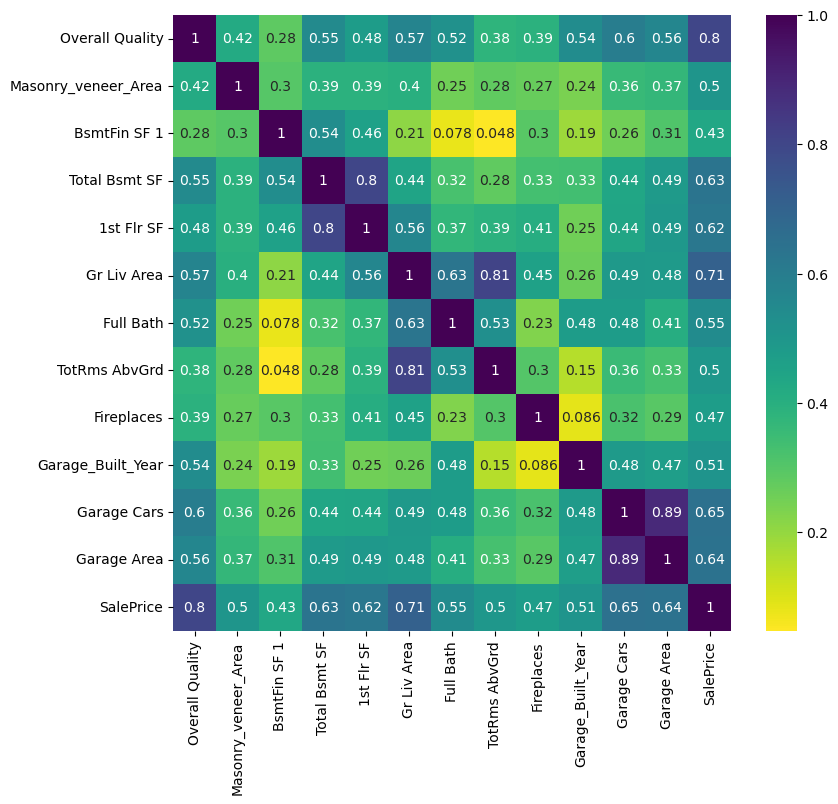

In [44]:
#plot a correlation heat map
plt.figure(figsize=[9,8])


num_df=df.select_dtypes(include=['int','float'])
sns.heatmap(data=num_df.corr(), annot=True, cmap='viridis_r')

Total Bsmt SF and 1st Flr SF,Gr Liv Area and TotalRms AbvGrd are highly correlated to each other so i will drop two.

In [45]:
df.columns

Index(['Overall Quality', 'Masonry_veneer_Area', 'BsmtFin SF 1',
       'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath',
       'TotRms AbvGrd', 'Fireplaces', 'Garage_Built_Year', 'Garage Cars',
       'Garage Area', 'SalePrice', 'IR1', 'IR2', 'IR3', 'Reg', 'Bnk', 'HLS',
       'Low', 'Lvl', 'Corner', 'CulDSac', 'FR2', 'FR3', 'Inside', '1Fam',
       '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE', 'Ex', 'Fa', 'Gd', 'TA', 'Ex',
       'Fa', 'Gd', 'Po', 'TA', 'BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone',
       'Wood', 'Ex', 'Fa', 'Gd', 'Po', 'TA', 'N', 'Y', 'Ex', 'Fa', 'Gd', 'Po',
       'TA', 'N', 'P', 'Y'],
      dtype='object')

In [46]:
df=df.drop(columns=['1st Flr SF','TotRms AbvGrd'], axis=1)

In [47]:
df.shape

(2930, 59)

In [48]:
df=df.drop(columns=['Fireplaces'], axis=1)

In [49]:
#remove outliers
Q1=df.quantile(0.25, axis=0)
Q3=df.quantile(0.75, axis=0)
IQR= Q3 - Q1

outliers=df[((df < (Q1-1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
outliers.shape

(2175, 58)

In [50]:
#remove the outliers
df=df[-((df < (Q1-1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [51]:
df.head()

,Overall Quality,Masonry_veneer_Area,BsmtFin SF 1,Total Bsmt SF,Gr Liv Area,Full Bath,Garage_Built_Year,Garage Cars,Garage Area,SalePrice,...,N,Y,Ex,Fa,Gd,Po,TA,N,P,Y
1,5,0.0,468.0,882.0,896,1,1961.0,1.0,730.0,105000,...,0,1,0,0,0,0,1,0,0,1
5,6,20.0,602.0,926.0,1604,2,1998.0,2.0,470.0,195500,...,0,1,0,0,1,0,0,0,0,1
19,6,119.0,790.0,1542.0,2073,2,1978.0,2.0,500.0,210000,...,0,1,0,0,0,0,1,0,0,1
21,7,81.0,885.0,1053.0,1173,2,1974.0,2.0,528.0,170000,...,0,1,0,0,1,0,0,0,0,1
22,7,0.0,533.0,814.0,1674,2,2000.0,2.0,663.0,216000,...,0,1,0,0,1,0,0,0,0,1


In [52]:
#scale train data and make predictions with model

x= df.drop(columns=['SalePrice'], axis=1)
y=df['SalePrice']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=42, random_state=4)

Scaler=MinMaxScaler()

x_train=Scaler.fit_transform(x_train)
x_test=Scaler.fit_transform(x_test)

In [56]:
#standardize train data

Scaler=StandardScaler()

x_train=Scaler.fit_transform(x_train)
x_test=Scaler.fit_transform(x_test)

reg= LinearRegression()
reg.fit(x_train, y_train)

kf=KFold(n_splits=10, shuffle=True, random_state=42)




mses=cross_val_score(reg, x_train, y_train, cv=kf, scoring='neg_mean_squared_error')
rmse=np.sqrt(-mses)
avg_rmse=np.mean(rmse)
train_accuracy=reg.score(x_train, y_train)
test_accuracy=reg.score(x_test,y_test)



print('{}  rmse:'.format(rmse))
print('{} avg_rmse:'.format(avg_rmse))
print('{} train_accuracy'.format(train_accuracy))
print('{} test_accuracy'.format(test_accuracy))

[18898.62725211 16199.22096755 20044.22992268 17162.00780883
 17567.31167895 17565.69355374 17986.24162053 17495.02983504
 17996.28098137 19901.94184434]  rmse:
18081.658546513623 avg_rmse:
0.8694009232796674 train_accuracy
0.8413265193228934 test_accuracy
